In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-27 11:33:21.209483


<h1>Tilastokeskuksen tietokannat</h1>

Tilastokeskuksen tietokannoista (http://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/) voin tallentaa päivittyvän linkin tietokantapoiminnan tuloksiin.

Seuraavassa käytän tietokantapoimintaa tietokantaan " Vanhojen osakeasuntojen hintaindeksi (2015=100) ja kauppojen lukumäärät, kuukausittain". Kyseiseen tietokantaan pääsee osoitteesta http://pxnet2.stat.fi/PXWeb/pxweb/fi/StatFin/StatFin__asu__ashi__kk/?tablelist=true

Tietokantapoiminnan viimeisessä vaiheessa (Näytä taulukko) voin tallentaa päivittyvän linkin tietokantapoimintaan <b>Tallenna poiminta</b> -toiminnolla.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_excel('http://pxnet2.stat.fi/PXWeb/sq/6ef1c06a-ab7a-4d2f-acee-c4216b99ff1f', skiprows = 3, usecols = [1, 2, 3, 4])
df

,Unnamed: 1,Koko maa,Pääkaupunkiseutu (PKS),Muu Suomi (koko maa pl. PKS)
0,2015M01,2119.0,3520.0,1605.0
1,2015M02,2140.0,3581.0,1614.0
2,2015M03,2184.0,3689.0,1639.0
3,2015M04,2150.0,3597.0,1622.0
4,2015M05,2155.0,3565.0,1636.0
...,...,...,...,...
151,NaN,NaN,NaN,NaN
152,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN


In [4]:
# Käytän Tallenna poiminta -toiminnolla tallentamaani linkkiä
# En ota mukaan kolmea ensimmäistä riviä ja sarakkeista vain [1, 2, 3, 4]
df = pd.read_excel('http://pxnet2.stat.fi/PXWeb/sq/6ef1c06a-ab7a-4d2f-acee-c4216b99ff1f', 
                   skiprows = 3, usecols = [1, 2, 3, 4])

# Nimeän huonosti nimetyn sarakkeen uudelleen
df = df.rename(columns = {'Unnamed: 1' : 'Kuukausi'})
df.head()

,Kuukausi,Koko maa,Pääkaupunkiseutu (PKS),Muu Suomi (koko maa pl. PKS)
0,2015M01,2119.0,3520.0,1605.0
1,2015M02,2140.0,3581.0,1614.0
2,2015M03,2184.0,3689.0,1639.0
3,2015M04,2150.0,3597.0,1622.0
4,2015M05,2155.0,3565.0,1636.0


In [5]:
# Uusimmat tiedot ovat tähdellä merkittyjä ennakkotietoja, jotka voivat vielä tarkentua
df['Kuukausi'].values

array(['2015M01', '2015M02', '2015M03', '2015M04', '2015M05', '2015M06',
       '2015M07', '2015M08', '2015M09', '2015M10', '2015M11', '2015M12',
       '2016M01', '2016M02', '2016M03', '2016M04', '2016M05', '2016M06',
       '2016M07', '2016M08', '2016M09', '2016M10', '2016M11', '2016M12',
       '2017M01', '2017M02', '2017M03', '2017M04', '2017M05', '2017M06',
       '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12',
       '2018M01', '2018M02', '2018M03', '2018M04', '2018M05', '2018M06',
       '2018M07', '2018M08', '2018M09', '2018M10', '2018M11', '2018M12',
       '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09', '2020M10', '2020M11', '2020M12',
       '2021M01*', '2021M02*', '2021M03*', '2021M04*', '2021M05*',
       '2021M06*', '2021M07*', '2021M08*', nan, nan, nan,

In [6]:
# Poistan puuttuvia tietoja sisältävä rivit
df = df.dropna(subset = ['Kuukausi'])

# Poistan tähdet
df['Kuukausi'] = df['Kuukausi'].astype(str).str.strip('*')

# Lisään aikaleimat indeksiin. Huomaa formaatti, jossa M vuosiluvun Y ja kuukauden m välissä!
df.index = pd.to_datetime(df['Kuukausi'], format = '%YM%m')
df = df.drop('Kuukausi', axis = 1)

# Lyhyemmät nimet
df.columns = ['Koko maa', 'Pääkaupunkiseutu', 'Muu Suomi']

df.tail()

,Koko maa,Pääkaupunkiseutu,Muu Suomi
Kuukausi,,,
2021-04-01,2404.0,4378.0,1719.0
2021-05-01,2455.0,4474.0,1754.0
2021-06-01,2439.0,4512.0,1729.0
2021-07-01,2450.0,4397.0,1766.0
2021-08-01,2499.0,4576.0,1781.0


Text(0, 0.5, 'Muu Suomi')

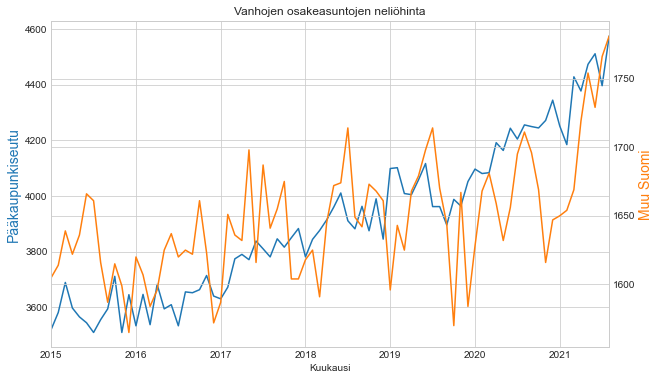

In [7]:
plt.figure(figsize = (10, 6))

ax1 = df['Pääkaupunkiseutu'].plot(color = 'C0', title = 'Vanhojen osakeasuntojen neliöhinta')
ax1.set_ylabel('Pääkaupunkiseutu', color = 'C0', fontsize = 14)

ax2 = ax1.twinx()
df['Muu Suomi'].plot(ax = ax2, color = 'C1')
ax2.set_ylabel('Muu Suomi', color = 'C1', fontsize = 14)